<a href="https://colab.research.google.com/github/routb68/jan-may-2023-prml-assignment/blob/main/2_1_and_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# READING THE CSV FILE 
df=pd.read_csv(r"/content/A2Data_train.csv",header=None)

In [ ]:
# CALCULATING GRADIENT DESCENT AND REQUIRED ALGORITHM
def gradientdescent(mul,x_mul_y,W0,eta,lemda):
    Wt=W0
    x_mul_y=np.multiply(x_mul_y,2)
    i=1
    #errorvec=[]
    itlist=[]
    import math
    while(i<1000):
        itlist.append(i)
        t1=np.matmul(mul, Wt)
        t1=np.multiply(t1,2)
        grad = np.subtract(t1, x_mul_y)
        
        extra=2*lemda    # new 
        rterm=np.multiply(Wt,extra)   #new
        grad=np.add(grad,rterm)
        
        
        div = np.linalg.norm(grad)
        div=1/div
        grad=np.multiply(grad,div)
        grad=np.multiply(grad,eta)
        W_next=np.subtract(Wt, grad)
        Wt=W_next
        i+=1
    return Wt

In [ ]:
# CALCULATING THE X MATRIX AND Y MATRIX
y=df[100]
df.drop(df.columns[[100]], axis=1, inplace=True)
data=df.to_numpy()

label=y.to_numpy().reshape(-1,1)

ones_column = np.ones(data.shape[0]).reshape((-1,1))
data = np.concatenate((data, ones_column), axis = 1)

data_for_wml=data
label_for_wml=label

In [ ]:
# CALCULATING THE REQUIRED W(ML)
transposedata=np.transpose(data)
mul=np.matmul(transposedata, data)
inversemat=np.linalg.inv(mul)
x_mul_y=np.matmul(transposedata, label)
W_ml=np.matmul(inversemat, x_mul_y)

In [ ]:
# INITIALIZATION OF INITIAL W
W0 = np.zeros((101, 1))
import random
for i in range(101):
    x = random.random()
    W0[i][0]=x
eta=0.1

In [ ]:
# CALLING THE gradientdescent FUNCTION
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=42)

transposedata=np.transpose(X_train)
mul=np.matmul(transposedata, X_train)
x_mul_y=np.matmul(transposedata, y_train)

In [ ]:
lemda_list=[]
for i in range(0,101):
    lemda_list.append(i)

In [ ]:
lemda_error=[]
for lemda in lemda_list:
    w=gradientdescent(mul,x_mul_y,W0,eta,lemda)
    y_predicted=np.matmul(X_test,w)
    err=np.subtract(y_predicted,y_test)
    errsquare = np.linalg.norm(err)
    errsquare=errsquare*errsquare
    lemda_error.append(errsquare)
    
minpos = lemda_error.index(min(lemda_error))
min_lemda=lemda_list[minpos]


print("minimum lemda is",min_lemda)

minimum lemda is 18


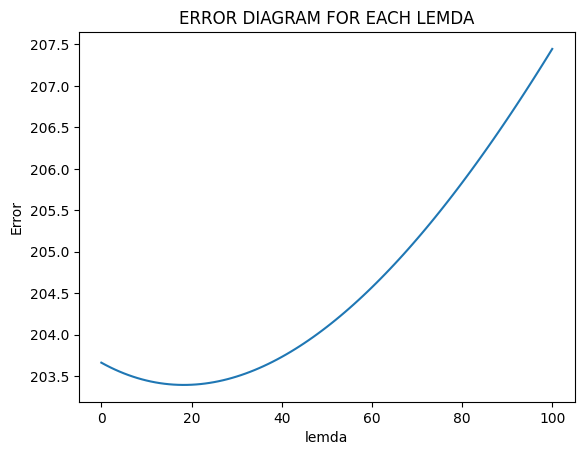

In [ ]:
# PLOTTING THE REQUIRED GRAPH  
lemda_list = np.array(lemda_list)
lemda_error=np.array(lemda_error)
plt.figure(1)
titletemp="ERROR DIAGRAM FOR EACH LEMDA" 
plt.title(titletemp)
plt.xlabel("lemda")
plt.ylabel("Error")
plt.plot(lemda_list,lemda_error)

In [ ]:
#FINDING Wr FOR BEST LEMDA

df=pd.read_csv(r"/content/A2Data_test.csv",header=None)


# In[15]:


# CALCULATING THE X MATRIX AND Y MATRIX
y=df[100]
df.drop(df.columns[[100]], axis=1, inplace=True)
data=df.to_numpy()
label=y.to_numpy().reshape(-1,1)
ones_column = np.ones(data.shape[0]).reshape((-1,1))
data = np.concatenate((data, ones_column), axis = 1)


# In[16]:


# CALCULATING THE REQUIRED W(r) FOR BEST LEMDA
transposedata=np.transpose(data_for_wml)
mul=np.matmul(transposedata, data_for_wml)
lemda_i = np.identity(mul.shape[0], dtype = int)
lemda_i=np.multiply(lemda_i,min_lemda)
mul=np.add(mul,lemda_i)
inversemat=np.linalg.inv(mul)
x_mul_y=np.matmul(transposedata, label_for_wml)
W_r=np.matmul(inversemat, x_mul_y)
# print("Wr is given below")
# print(W_r)


# In[17]:


# CALCULATING TEST ERROR OF W_ml
y_pred_ml=np.matmul(data,W_ml)
error_W_ml=np.subtract(y_pred_ml,label)
error = np.linalg.norm(error_W_ml)
error=error*error
print(error_W_ml.shape)
print("square error of W_ml on test data is ",error)


# In[18]:


# CALCULATING TEST ERROR OF W_r
y_pred_r=np.matmul(data,W_r)
error_W_r=np.subtract(y_pred_r,label)
error = np.linalg.norm(error_W_r)
error=error*error
print(error_W_r.shape)
print("square error of W_r on test data is ",error)

(500, 1)
square error of W_ml on test data is  185.37575114435964
(500, 1)
square error of W_r on test data is  181.70162422305762
